<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/SVM-DigitsDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM - On Digits DataSet, using different Kernel Values

In [8]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 'columns'), df.target, test_size = 0.2)

In [14]:
print(len(X_train))
print(len(X_test))

1437
360


In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1650,0.0,0.0,15.0,13.0,13.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,15.0,1.0,0.0,0.0,0.0
299,0.0,0.0,6.0,16.0,16.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0
1083,0.0,0.0,0.0,14.0,14.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,12.0,12.0,0.0,0.0,0.0
960,0.0,0.0,2.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,3.0,14.0,16.0,16.0,5.0,0.0
920,0.0,1.0,12.0,13.0,13.0,0.0,0.0,0.0,0.0,4.0,...,3.0,0.0,0.0,1.0,13.0,16.0,12.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,0.0,0.0,0.0,12.0,15.0,4.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,1.0,11.0,16.0,16.0,4.0,0.0
525,0.0,0.0,3.0,11.0,15.0,8.0,0.0,0.0,0.0,3.0,...,7.0,0.0,0.0,0.0,3.0,16.0,15.0,8.0,1.0,0.0
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1194,0.0,0.0,6.0,12.0,14.0,4.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,0.0,7.0,13.0,12.0,4.0,0.0,0.0


Using RBF kernel

In [20]:
from sklearn.svm import SVC
rbf_model = SVC(kernel = 'rbf')
rbf_model.fit(X_train, y_train)
rbf_model.score(X_test, y_test)

0.9916666666666667

Using Linear Kernel

In [21]:
linear_model = SVC(kernel = 'linear')
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.9666666666666667

Using poly kernel

In [22]:
poly_model = SVC(kernel = 'poly')
poly_model.fit(X_train, y_train)
poly_model.score(X_test, y_test)

0.9888888888888889

Using Sigmoid Kernel

In [23]:
sigmoid_model = SVC(kernel = 'sigmoid')
sigmoid_model.fit(X_train, y_train)
sigmoid_model.score(X_test, y_test)

0.8916666666666667

In [29]:
y_predicted = sigmoid_model.predict(X_test)
y_predicted

array([0, 1, 6, 3, 4, 9, 6, 3, 5, 3, 7, 0, 6, 4, 3, 3, 8, 7, 5, 2, 3, 1,
       0, 2, 2, 2, 9, 9, 5, 5, 2, 5, 4, 0, 3, 0, 9, 4, 1, 7, 4, 3, 2, 4,
       7, 3, 9, 0, 5, 3, 5, 8, 0, 1, 3, 5, 3, 6, 2, 7, 7, 6, 5, 9, 7, 2,
       3, 7, 3, 2, 4, 8, 5, 4, 4, 1, 9, 6, 4, 3, 4, 6, 8, 9, 0, 4, 1, 4,
       5, 0, 4, 8, 7, 7, 4, 1, 1, 9, 9, 7, 9, 6, 7, 1, 5, 4, 7, 2, 1, 4,
       9, 0, 5, 5, 4, 1, 3, 9, 1, 9, 9, 3, 9, 3, 7, 9, 5, 9, 2, 8, 5, 2,
       2, 5, 8, 6, 7, 5, 8, 8, 3, 5, 5, 4, 6, 0, 8, 0, 9, 6, 7, 6, 1, 6,
       0, 5, 1, 9, 7, 3, 5, 8, 3, 4, 1, 4, 0, 5, 8, 4, 6, 6, 7, 6, 9, 3,
       5, 0, 9, 3, 0, 6, 8, 5, 7, 0, 7, 8, 5, 6, 9, 2, 2, 3, 3, 1, 0, 9,
       1, 2, 9, 9, 6, 0, 4, 0, 5, 0, 5, 1, 9, 0, 8, 9, 7, 8, 6, 5, 8, 5,
       9, 6, 1, 5, 0, 9, 0, 2, 2, 1, 3, 8, 2, 6, 0, 5, 1, 7, 4, 3, 4, 3,
       5, 4, 5, 9, 9, 5, 4, 6, 0, 6, 8, 1, 7, 9, 5, 3, 5, 3, 0, 8, 2, 8,
       7, 2, 2, 3, 6, 4, 4, 2, 6, 0, 0, 2, 2, 3, 0, 7, 3, 3, 6, 8, 3, 1,
       4, 7, 9, 0, 3, 5, 2, 9, 1, 4, 7, 9, 6, 3, 5,

In [25]:
y_test

1415    0
1107    1
1222    6
62      3
97      4
       ..
1538    8
716     1
1791    4
1529    8
999     3
Name: target, Length: 360, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  3,  0,  0,  0,  1,  2,  0,  2],
       [ 0,  2, 29,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  2,  0],
       [ 3,  0,  0,  0, 35,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  1],
       [ 0,  6,  2,  1,  0,  1,  0,  0, 24,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 35]])

Text(70.72222222222221, 0.5, 'Truth')

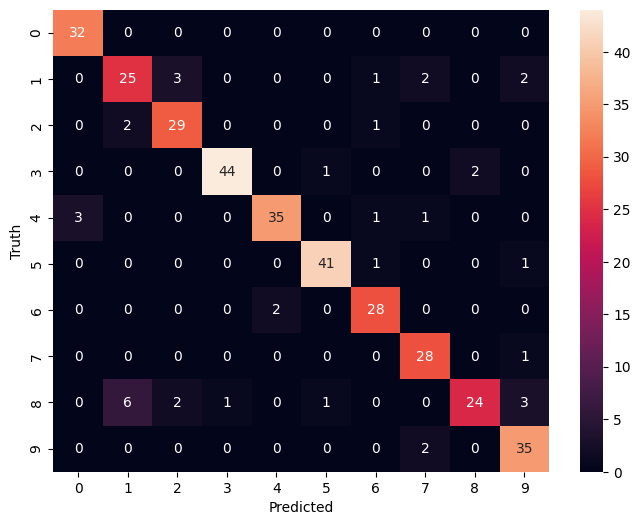

In [34]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')